# K means Clustering 

## Introduction

- K-Means Clustering is an Unsupervised Machine Learning algorithm, which groups the unlabeled dataset into different clusters.
- Unsupervised Machine Learning is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations. 
- The goal of clustering is to divide the population or set of data points into a number of groups so that the data points within each group are more comparable to one another and different from the data points within the other groups. It is essentially a grouping of things based on how similar and different they are to one another. 
- We are given a data set of items, with certain features, and values for these features (like a vector). The task is to categorize those items into groups. To achieve this, we will use the K-means algorithm; an unsupervised learning algorithm. ‘K’ in the name of the algorithm represents the number of groups/clusters we want to classify our items into.

- (It will help if you think of items as points in an n-dimensional space). The algorithm will categorize the items into k groups or clusters of similarity. To calculate that similarity, we will use the Euclidean distance as a measurement.

### The algorithm works as follows:  

1. First, we randomly initialize k points, called means or cluster centroids.
2. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

The “points” mentioned above are called means because they are the mean values of the items categorized in them. To initialize these means, we have a lot of options. An intuitive method is to initialize the means at random items in the data set. Another method is to initialize the means at random values between the boundaries of the data set (if for a feature x, the items have values in [0,3], we will initialize the means with values for x at [0,3]).

### The above algorithm in pseudocode is as follows:  

Initialize k means with random values

    --> For a given number of iterations:
    
        --> Iterate through items:
    
            --> Find the mean closest to the item by calculating the euclidean distance of the item with each of the means
        
            --> Assign item to mean
        
            --> Update mean by shifting it to the average of the items in that cluster

# Import the necessary Libraries

We are importing Numpy for statistical computations, Matplotlib to plot the graph, and make_blobs from sklearn.datasets.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Create the custom dataset with make_blobs and plot it

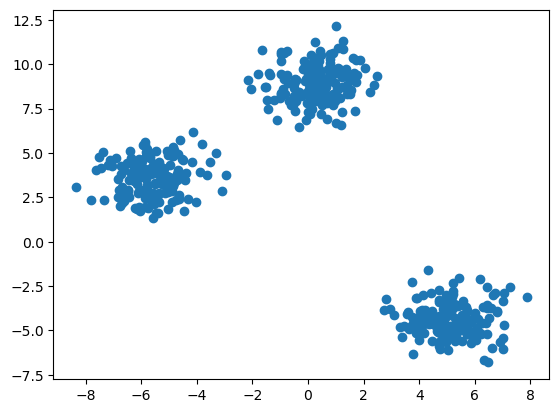

In [6]:
X,y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [9]:
X[:10]

array([[-4.96938657,  3.53724005],
       [-4.81246011,  5.14500747],
       [-5.02457784,  3.16461048],
       [ 6.42385686, -3.54076191],
       [-6.62888728,  2.31853249],
       [-6.68706136,  3.09425861],
       [-0.7394091 , 10.76263031],
       [ 6.31100474, -6.67020069],
       [ 0.32168514,  9.69462806],
       [ 0.18461129, 10.13165641]])

In [12]:
y[:10]

array([2, 2, 2, 1, 2, 2, 0, 1, 0, 0])

Initialize the random centroids

In [40]:
k = 3
clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

Plot the random initialize center with data points

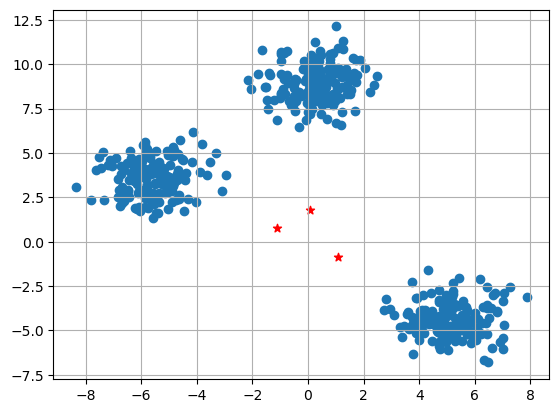

In [41]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

Define euclidean distance

In [42]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

Create the function to Assign and Update the cluster center

In [43]:
#Implementing E step 
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

Create the function to Predict the cluster for the datapoints

In [44]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

Assign, Update, and predict the cluster center

In [45]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

Plot the data points with their predicted cluster center

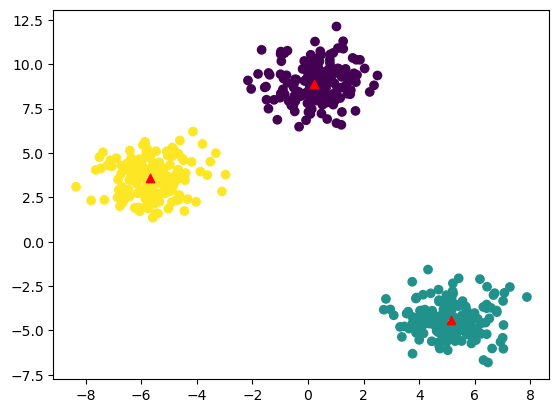

In [46]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()